In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# read data file
data_full = pd.read_csv("bci05.csv")
data_full.describe()

,tag,gx,gy,dbh,pom,date
count,368122.000000,368035.000000,368035.000000,208387.000000,368122.000000,368070.000000
mean,262011.545901,494.356946,254.214007,49.337660,0.696302,8912.050490
std,201947.633329,291.017349,144.039966,83.399585,0.653746,77.962794
min,-42299.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,107171.250000,237.800000,130.300000,16.000000,0.000000,8841.000000
50%,210413.500000,492.200000,254.700000,25.000000,1.000000,8915.000000
75%,409068.750000,747.700000,380.100000,47.000000,1.000000,8975.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


In [3]:
# keep only data for ALIVE species
data_full = data_full[data_full["status"] == 'A']
data = data_full[["sp","gx", "gy"]]
S = data["sp"].nunique()
Species = data["sp"].unique()
print("# species (S) =", S)
print("# alive trees =", data["sp"].count())
print("Species list:", Species)

# species (S) = 299
# alive trees = 208387
Species list: ['ACACME' 'ACALDI' 'ACALMA' 'ADE1TR' 'AEGIPA' 'ALCHCO' 'ALCHLA' 'ALIBED'
 'ALLOPS' 'ALSEBL' 'AMAICO' 'ANACEX' 'ANAXPA' 'ANDIIN' 'ANNOAC' 'ANNOSP'
 'APEIME' 'APEITI' 'APHESI' 'APPUSE' 'ARDIBA' 'ARDIFE' 'ARDIGU' 'ASPICR'
 'AST1ST' 'AST2GR' 'BACTBA' 'BACTC1' 'BACTMA' 'BEILPE' 'BOROPA' 'BROSAL'
 'BROSGU' 'CALOLO' 'CAPPFR' 'CASEAC' 'CASEAR' 'CASECO' 'CASEGU' 'CASESY'
 'CASSEL' 'CAVAPL' 'CECRIN' 'CECRLO' 'CECROB' 'CEDROD' 'CEIBPE' 'CELTSC'
 'CESPMA' 'CESTME' 'CHA1TE' 'CHA2SC' 'CHIMPA' 'CHR1EC' 'CHR2AR' 'CHR2CA'
 'CLIDDE' 'CLIDOC' 'CLIDSE' 'COCCCO' 'COCCMA' 'COLUGL' 'CONOBR' 'CONOCI'
 'CORDAL' 'CORDBI' 'CORDLA' 'COU2CU' 'COUTHE' 'CROTBI' 'CUPACI' 'CUPALA'
 'CUPARU' 'CUPASY' 'CYPHHA' 'DENDAR' 'DES2PA' 'DIO2AR' 'DIPTPA' 'DRYPST'
 'ELAEOL' 'ENTESC' 'ERY1CO' 'ERY2MA' 'ERY2PA' 'EUGECO' 'EUGEGA' 'EUGENE'
 'EUGEOE' 'FARAOC' 'FICUBU' 'FICUC2' 'FICUCI' 'FICUIN' 'FICUMA' 'FICUOB'
 'FICUPO' 'FICUTO' 'FICUTR' 'FICUYO' 'GAR2IN' 'GAR2MA' 'GENIAM' 'GU

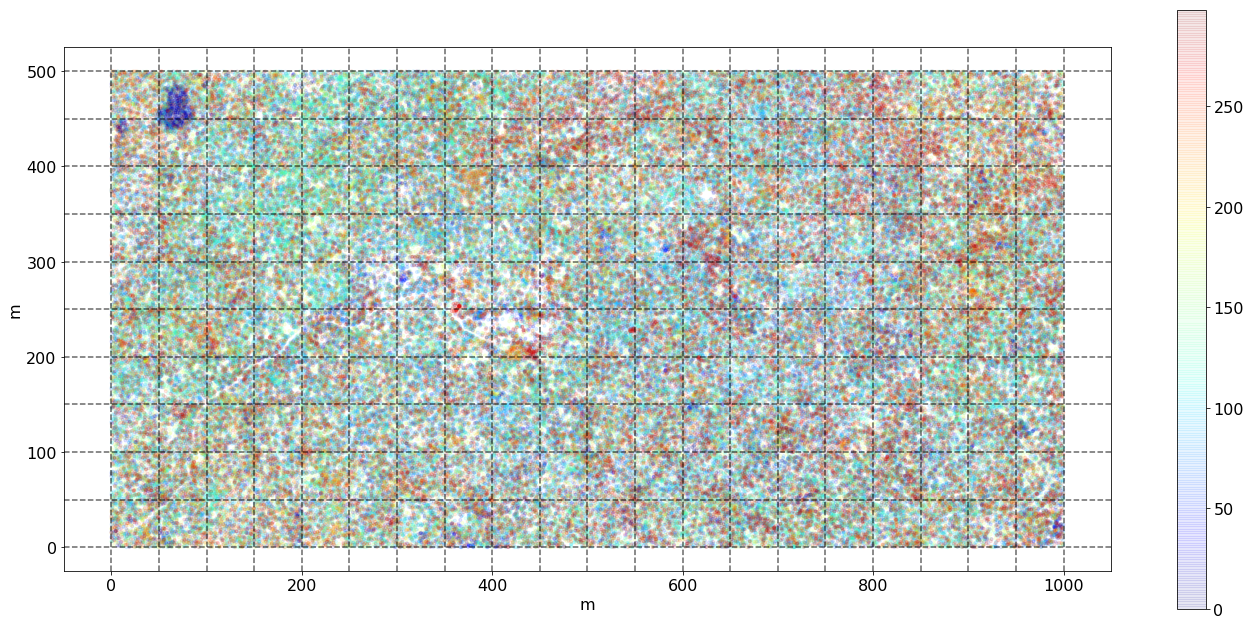

In [4]:
# plot of the species
from sklearn.preprocessing import LabelEncoder

# assign to each species a number, in order to plot using a colormap
labelencoder = LabelEncoder()
species = labelencoder.fit_transform(data["sp"])
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout(pad=5)
plot = ax.scatter(data["gx"], data["gy"], c=species, cmap="jet", alpha=.1, marker=".")
cbar = fig.colorbar(plot,format='%i')
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("m", fontsize=16)
ax.set_ylabel("m", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_aspect("equal")

# add horizontal and verticla lines to show the subplots
for line in [x for x in range(0, 1001, 50)]: ax.axvline(line, 0, 1, color="black", linestyle="--", alpha=.6)
for line in [x for x in range(0,  501, 50)]: ax.axhline(line, 0, 1, color="black", linestyle="--", alpha=.6)

plt.show()
#fig.savefig("./Figure/forest.pdf")
fig.savefig("./Figure/forest.png")

In [5]:
# divide the data in 200 subplots
xdiv = [x for x in range(0, 1001, 50)]
ydiv = [x for x in range(0,  501, 50)]

subplot = []
df = pd.DataFrame()

for i in range(len(xdiv)-1):
    for j in range(len(ydiv)-1):
        df = data[data["gx"] >= xdiv[i]  ]
        df =   df[  df["gx"] <  xdiv[i+1]]
        df =   df[  df["gy"] >= ydiv[j]  ]
        df =   df[  df["gy"] <  ydiv[j+1]]
        subplot.append(df)


In [6]:
# the ij element indicates the abundance of species j in subplot i
# rows i    -> subplots
# columns j -> species
abundance_matrix = np.zeros((len(subplot), S))
for i, df in enumerate(subplot):
    for j, p in enumerate(Species):
        n = df[df["sp"] == p].shape[0]
        abundance_matrix[i,j] = n
print(abundance_matrix.shape)
abundance_matrix

(200, 299)


array([[ 0., 25.,  9., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6.,  0., ...,  2.,  0.,  0.]])

In [7]:
abundance_matrix.max(), abundance_matrix.min()

(548.0, 0.0)

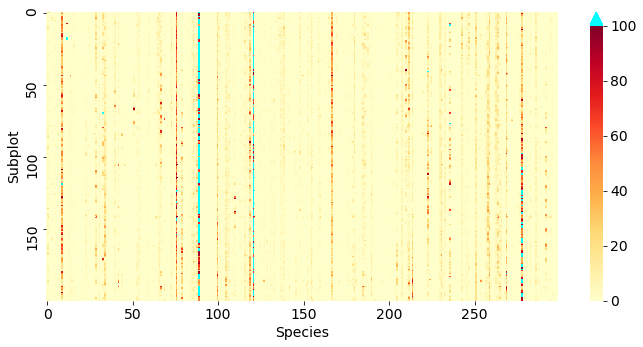

In [8]:
# plot the abundance matrix as a heatmap
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=2.5)
cmap = plt.cm.get_cmap("YlOrRd")
cmap.set_over("cyan")
sns.heatmap(abundance_matrix, cmap=cmap, square=False, xticklabels=50, yticklabels=50, ax=ax, vmax=100, 
            cbar_kws={"extend":"max"})
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Subplot", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.savefig("./Figure/abundance_matrix.pdf")

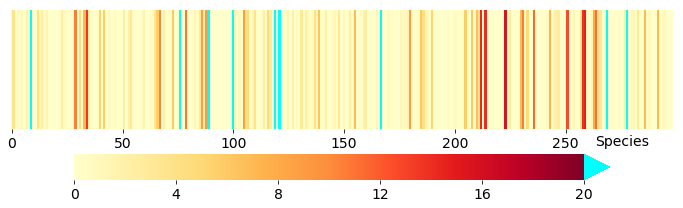

In [9]:
# plot the average abundance vector as a heatmap
fig, ax = plt.subplots(figsize=(10,3))
cmap = plt.cm.get_cmap("YlOrRd")
cmap.set_over("cyan")
sns.heatmap(abundance_matrix.mean(axis=0).reshape(1,299), cmap=cmap, square=False, xticklabels=50, yticklabels=False, ax=ax, vmax=20, 
            cbar_kws={"extend":"max", "orientation":"horizontal"})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate("Species", xy=(.87,.3), xycoords='figure fraction', 
             fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/average_abundance_heatmap.pdf")

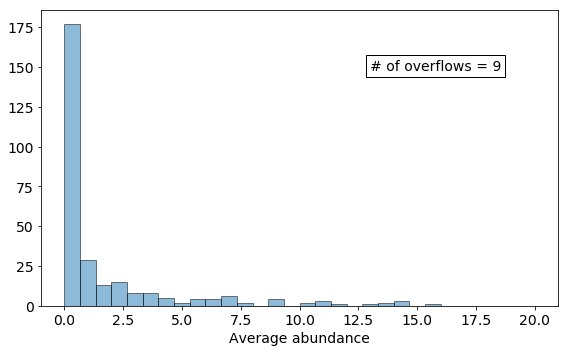

In [10]:
# plot the average abundance vector as a histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(abundance_matrix.mean(axis=0), bins=30, range=(0,20), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Average abundance", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_xlim(0, 20)
overflow = (abundance_matrix.mean(axis=0) > 20).sum()
ax.annotate("# of overflows = "+str(overflow), xy=(.65,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/average_abundance_hist.pdf")

In [11]:
# create the presence matrix from the abudance matrix
presence_matrix = abundance_matrix > 0
average_presence = presence_matrix.mean(axis=0)
'''for x,y in zip(Species, average_presence):
    print(x, y)'''
print(average_presence)

[0.05  0.765 0.08  0.275 0.18  0.515 0.01  0.71  0.34  1.    0.04  0.115
 0.02  0.72  0.72  0.335 0.69  0.17  0.03  0.005 0.01  0.28  0.035 0.67
 0.5   0.215 0.025 0.01  0.07  0.86  0.005 0.945 0.025 0.825 0.985 0.77
 0.37  0.085 0.065 0.44  0.96  0.105 0.79  0.04  0.385 0.045 0.23  0.425
 0.005 0.22  0.03  0.29  0.01  0.565 0.91  0.44  0.08  0.04  0.01  0.43
 0.755 0.005 0.015 0.28  0.345 0.845 0.955 0.93  0.015 0.48  0.045 0.175
 0.265 0.93  0.02  0.305 1.    0.295 0.22  0.78  0.045 0.06  0.305 0.695
 0.405 0.85  0.99  0.855 0.98  1.    0.02  0.035 0.005 0.055 0.04  0.03
 0.015 0.105 0.025 0.035 1.    0.685 0.26  0.52  0.25  0.99  0.95  0.87
 0.245 0.69  0.775 0.3   0.005 0.33  0.785 0.315 0.915 0.865 0.09  1.
 0.33  1.    0.285 0.18  0.24  0.77  0.01  0.735 0.01  0.215 0.12  0.905
 0.025 0.73  0.59  0.095 0.33  0.96  0.62  0.985 0.38  0.095 0.595 0.02
 0.005 0.305 0.445 0.22  0.83  0.005 0.53  0.005 0.19  0.775 0.13  0.975
 0.02  0.01  0.27  0.575 0.76  0.01  0.05  0.155 0.045 0.4  

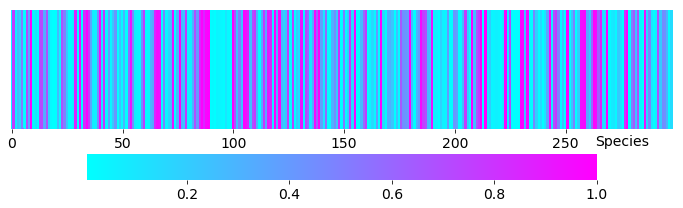

In [12]:
# plot the average presence vector as a heatmap
fig, ax = plt.subplots(figsize=(10,3))
cmap = plt.cm.get_cmap("cool")
sns.heatmap(presence_matrix.mean(axis=0).reshape(1,299), cmap=cmap, square=False, 
            xticklabels=50, yticklabels=False, ax=ax, cbar_kws={"orientation":"horizontal"})
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_xlabel("Species", fontsize=14)
ax.annotate("Species", xy=(.87,.3), xycoords='figure fraction', 
             fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/average_presence_heatmap.pdf")

# Max Ent 1

$$\mathcal{H} = -\sum_{i=1}^S \lambda_i \sigma_i$$

$$ P(\sigma_i) = \frac{1}{Z}e^{\sum_{i=1}^S \lambda_i \sigma_i} $$

$$ Z = \sum_{\{\sigma\}}e^{\sum_{i=1}^S \lambda_i \sigma_i}  $$

$$ \langle \sigma_i \rangle = m_i = \frac{\partial \ln{Z}}{\partial \lambda_i} = \tanh{\lambda_i} \Rightarrow \lambda_i = \tanh^{-1}(m_i) $$

In [13]:
# calculate lagrangian parameters (analytical expression is possible for Max Ent 1 model)
m = 2*average_presence-1
lambda_MaxEnt1 = np.arctanh(m)
#print(lambda_MaxEnt1)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until


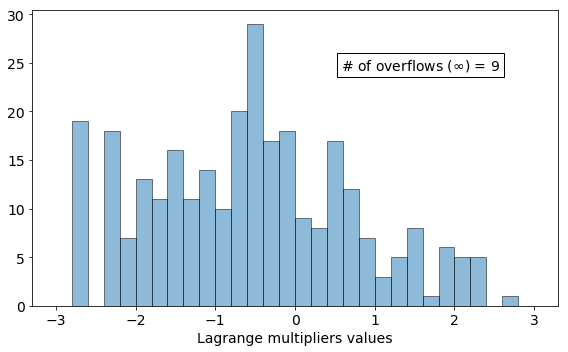

In [14]:
# plot the lagrangian parameters as a histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(lambda_MaxEnt1, bins=30, range=(-3,3), histtype='bar', ec='black', alpha=.5)
overflow = (lambda_MaxEnt1 > 3).sum()
ax.annotate("# of overflows ($\\infty$) = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("Lagrange multipliers values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt1_Lambdas_hist.pdf")

In [15]:
# check if I get the same results if I use a Ising model like matrix
# (+1 -> presence, -1 -> absence), instead of doing the analisys
# and then appling the condotion: m = 2*average_presence-1
presence_matrix_Ising = presence_matrix.copy()
presence_matrix_Ising = presence_matrix_Ising.astype(int)
presence_matrix_Ising[presence_matrix_Ising == 0] = -1

average_presence_Ising = presence_matrix_Ising.mean(axis=0)

lambda_MaxEnt1_Ising = np.arctanh(average_presence_Ising)
np.allclose(lambda_MaxEnt1_Ising, lambda_MaxEnt1)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in arctanh
  # Remove the CWD from sys.path while we load stuff.


True

In [16]:
def H1(Lambda, configuration):
    sigma = configuration.mean(axis=0)
    return -np.dot(Lambda, sigma)
H1(lambda_MaxEnt1_Ising, presence_matrix_Ising)

-inf

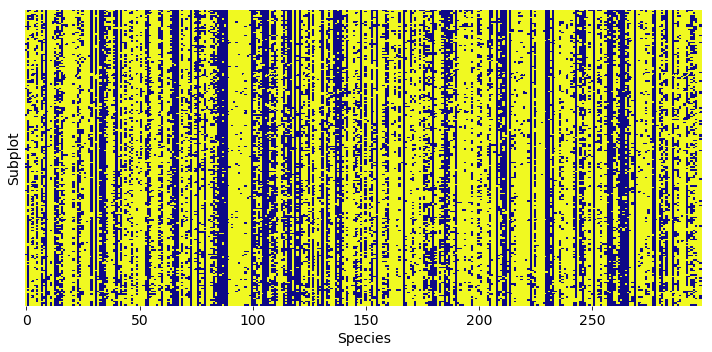

In [17]:
# plot the presence matrix as a heatmap
# blue   -> present
# yellow -> absent

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=2.5)
sns.heatmap(presence_matrix_Ising, cbar=False, cmap="plasma_r", square=False, xticklabels=50, yticklabels=False, ax=ax)
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Subplot", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
#cbar = ax.collections[0].colorbar
#cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/presence_matrix.pdf")


# Max Ent 2

$$\mathcal{H} = -\sum_{j=1}^S \lambda_j \sigma_j - \frac{k}{S}(\sum_{j=1}^S \sigma_j)^2$$

Constraints:

1. $(1-m_i)/2 = p_i \Rightarrow$ Ising-like presence matrix
2. $\langle(\sum_{j=1}^S \sigma_j)^2\rangle_{emp} = \langle(S_+ - S_-)^2\rangle_{emp}$

In [18]:
# calculate the constraints using data
constr1_data = average_presence_Ising.copy()
constr2_data = np.mean((presence_matrix_Ising.sum(axis=1))**2)/S
print(constr2_data)

21.32829431438127


In [19]:
# energy for Max Ent 2 model
def H2(Lambda, k, configuration):
    first_sum  = np.dot(Lambda, configuration)
    second_sum = (k/configuration.shape[0])*(np.sum(configuration))**2
    
    return(-first_sum - second_sum)

In [20]:
# Metropolis algorithm to generate MC states
np.random.seed(20190324)

def Metropolis(Lambda,k,n_steps=10000, beta=1, species=299, verbose=False):
    config = np.random.choice([-1,1], species)
    # list to save the configurations
    Configuration = [config]
    # list to save the energies
    Energy = [H2(Lambda, k, config)]
    for i in range(n_steps):
        # save initial configuration
        config_init = config.copy()
        # Calculate the energy of the initial configuration
        E_init = H2(Lambda, k, config_init)
        
        # change one element at random in the configuration
        config_final = config_init.copy()
        config_final[np.random.randint(0, species)] *= -1
        
        # Calculate the energy of the final configuration
        E_final = H2(Lambda, k, config_final)
                
        # if E_final < E_init always accept the new configuration
        # if E_final > E_init accept the new configuration with probability = exp[-beta(E_final-E_init)]
        threshold = np.exp(beta*(E_init-E_final)) #     threshold > 1 if E_final < E_init
                                                  # 0 < threshold < 1 if E_final > E_init
        # get random number in [0,1] and accept the configuration if it's lower than the threshold
        if np.random.rand() < threshold:
            config = config_final.copy()
            Configuration.append(config)
            Energy.append(E_final)
            if verbose: print("Accepted with prob", np.minimum(threshold, 1))
        else:
            config = config_init.copy()
            Configuration.append(config)
            Energy.append(E_init)
            if verbose: print("Rejected with prob", 1-threshold)
                
    return Configuration, Energy

Config: 10001
En: 10001


Text(0, 0.5, 'Energy')

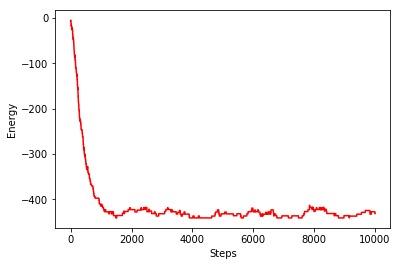

In [21]:
# test Metropolis, plotting the energy vs the iteration
l = np.random.rand(len(lambda_MaxEnt1_Ising))
Config, En = Metropolis(l, k=1, n_steps=10000, beta=1)
print("Config:", len(Config))
print("En:", len(En))
plt.plot(En,color='r')
plt.xlabel("Steps")
plt.ylabel("Energy")


In [22]:
# last Metropolis configuration
Config[-1]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
# this function keeps only the last states generated by Metropolis,
# and it uses them to calculate the constraints from the MC samples
def param_from_Metropolis(Configurations, discard_rate=.75):
    Config  = np.array(Configurations) 
    Config_ = Config[int(discard_rate*Config.shape[0]):,:] # use only the last configurations
    constr1 = Config_.mean(axis=0)
    constr2 = np.mean((Config_.sum(axis=1))**2)/Config_.shape[1]
    return constr1, constr2

In [24]:
from os.path import isfile

Lambda_list_path = "./Lambda_list.gz"
k_list_path      = "./k_list.gz"

# if the lagrangian parameters are already been calculated and saved, load them 
if isfile(Lambda_list_path) and isfile(k_list_path):
    print("Lambda & k list found: loading data")
    Lambda_list = np.loadtxt(Lambda_list_path)
    k_list      = np.loadtxt(k_list_path)
# calculate the lagrangian parameters from using gradient descend and Metropolis
else:
    print("Lambda & k list not found: creating data")
    # initialize the values at random (between [-3,3])
    Lambda = (np.random.rand(len(lambda_MaxEnt1_Ising))-0.5)*6
    k = 1.1
    n_iter = 10000 # gradient descend iterations
    eta = 1e-03    # learning rate
    # save the lagrangian parameters at each iteration
    Lambda_list = [Lambda]
    k_list = [k]
    # save the difference between data and model constraints at each iteration
    constr1_diff = []
    constr2_diff = []
    # gradient descend to find the lagrangian parameters of the model
    for t in range(n_iter):
        # generate random configurations (Metropolis)
        Config, En = Metropolis(Lambda, k, n_steps=5000, beta=1)
        # get constraints from Metropolis configurations
        constr1_model, constr2_model = param_from_Metropolis(Config)
        # calc the difference betweeen model and data constraints
        diff1 = constr1_data - constr1_model
        diff2 = constr2_data - constr2_model
        # update parameters
        Lambda += eta*diff1
        k      += eta*diff2
        # save the values at each iteration
        Lambda_list.append(Lambda.copy())
        k_list.append(k)
        constr1_diff.append(diff1)
        constr2_diff.append(diff2)
        if (t+1)%1000==0: 
            print("Iteration {:d}/{:d}".format(t+1, n_iter))
    print("Data created: saving file")
    # save the list of lagrangian parameters, in order not to repeat the simulation every time
    # (due to the time needed for that)
    Lambda_list = np.array(Lambda_list)
    k_list      = np.array(k_list)
    np.savetxt(Lambda_list_path, Lambda_list)
    np.savetxt(k_list_path, k_list)

Lambda & k list found: loading data


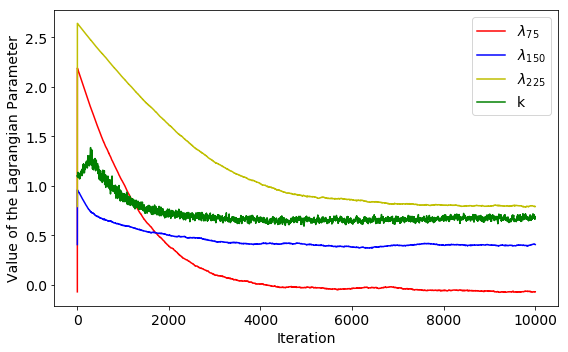

In [25]:
# plot some lagrangian parameters vs the iteration, to see if they converge
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(Lambda_list[:,  75], "r-", label="$\\lambda_{75}$")
ax.plot(Lambda_list[:, 150], "b-", label="$\\lambda_{150}$")
ax.plot(Lambda_list[:, 225], "y-", label="$\\lambda_{225}$")
ax.plot(k_list, "g-", label="k")
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Value of the Lagrangian Parameter", fontsize=14)
ax.legend(loc="best", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt2_parameters_convergence.pdf")

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
D:\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


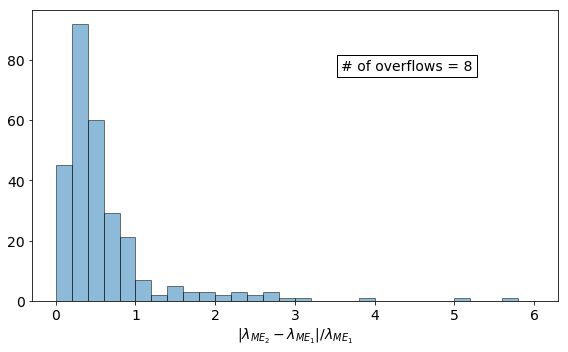

In [26]:
# difference between lambdas of Max Ent 1 and 2 as histogram
#lambda_MaxEnt2_Ising = np.mean(Lambda_list[:,8000:], axis=1)
lambda_MaxEnt2_Ising = Lambda_list[-1].copy()
fig, ax = plt.subplots(figsize=(8,5))
perc_diff = abs((lambda_MaxEnt2_Ising-lambda_MaxEnt1_Ising)/lambda_MaxEnt1_Ising)
ax.hist(perc_diff, bins=30, range=(0,6), histtype='bar', ec='black', alpha=.5)
overflow = (perc_diff > 6).sum()
ax.annotate("# of overflows = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("$|\\lambda_{ME_2} - \\lambda_{ME_1}|/\\lambda_{ME_1}$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt1-2_Lambdas_diff_hist.pdf")

In [27]:
# final values of lagrangian parameters for Max Ent 2
print("k =", k_list[-1])
print("lambda =\n", lambda_MaxEnt2_Ising)

k = 0.6797932142580242
lambda =
 [-1.21262088  0.95428479 -0.85244391 -0.16000445 -0.38956791  0.3779555
 -1.34915134  0.79434146 -0.00357914  2.04307926 -1.09388439 -0.68076652
 -1.26449218  0.83477568  0.83420328  0.01122131  0.748337   -0.52142818
 -2.37050529 -1.44162698 -1.31392735 -0.12575871 -1.43455879  0.70878926
  0.35421458 -0.32738417 -1.23187173 -1.55854022 -1.25767123  1.26374855
 -2.45145507  1.72571829 -1.24240512  1.10981744  2.0476114   0.94987262
  0.08872648 -0.83006612 -1.31502539  0.21441629  1.80460021 -0.72208596
  1.00605631 -2.02988932  0.12204082 -1.0626864  -0.25211059  0.21382338
 -2.01238578 -0.31719602 -1.17015972 -0.1113038  -2.4154459   0.49216426
  1.52955283  0.22956294 -0.89681043 -1.19066955 -1.35688182  0.19209891
  0.91453576 -1.51185486 -1.96937745 -0.12400813  0.02002393  1.19788793
  1.82861601  1.68825253 -1.31082763  0.31769128 -1.06649619 -0.44436411
 -0.16028432  1.5962141  -1.25350306 -0.07157212  2.626829   -0.09554133
 -0.29737148  0.988

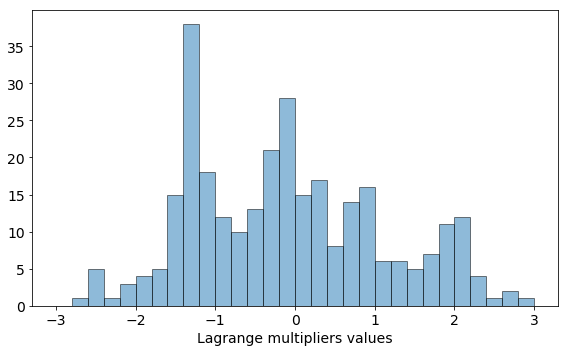

In [28]:
# plot the lagrangian parameters as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(lambda_MaxEnt2_Ising, bins=30, range=(-3,3), histtype='bar', ec='black', alpha=.5)
overflow = (lambda_MaxEnt2_Ising > 3).sum()
#ax.annotate("# of overflows ($\\infty$) = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
#            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("Lagrange multipliers values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt2_Lambdas_hist.pdf")

# Random Field Model

$$2J(\sigma) = \left [\int \frac{1}{\sqrt{2\pi\sigma^2}}\frac{e^{\frac{-h^2}{2\sigma^2}}}{\cosh h ^2}\, dh\right]^{-1}$$

ref = https://inordinatum.wordpress.com/2013/01/20/mean-field-solution-of-the-random-field-ising-model/

In [29]:
l_mean = np.mean(lambda_MaxEnt2_Ising)
l_std  = np.std(lambda_MaxEnt2_Ising)
print("Mean =", l_mean)
print("Std  =", l_std)

Mean = -0.0988201403507008
Std  = 1.209850648263973


In [30]:
k_star = np.mean(np.array(k_list[-250:]))
k_star

0.6809245015492612

In [31]:
import scipy as sc
def phase_diagram_points(sigma):
        integrand = lambda z: np.exp(-0.5*np.square(z/sigma))/(np.sqrt(2*np.pi*sigma*sigma)*(np.cosh(z)**2))
        return 1/(2*sc.integrate.quad(integrand, -np.inf, np.inf)[0])

In [32]:
length = 1000
sigmas = np.linspace(0.001,2, length)
Js = np.zeros(length)
for i in range(length):
    Js[i]=phase_diagram_points(sigmas[i])

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


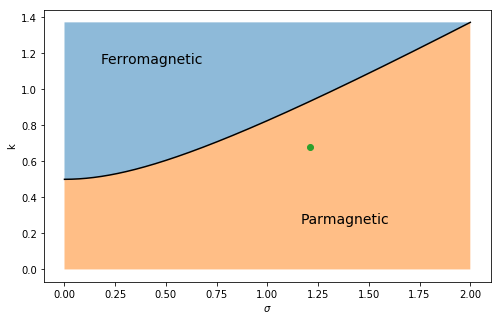

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(sigmas, Js, color='black')
ax.set_xlabel('$\sigma$')
ax.set_ylabel('k')
ax.fill_between(sigmas, Js, np.max(Js), alpha=0.5)
ax.fill_between(sigmas, 0,Js, alpha=0.5)
ax.scatter(l_std,k_star)
ax.annotate("Parmagnetic", xy=(.6,.3), xycoords='figure fraction', 
             fontsize=14)
ax.annotate("Ferromagnetic", xy=(.2,.8), xycoords='figure fraction', 
             fontsize=14)
plt.show()

# Max Ent 3

In [34]:
average_abundance = abundance_matrix.mean(axis=0)
std_abundance     = abundance_matrix.std(axis=0)
# select the most abundant species
sel = average_abundance-std_abundance > 0
selection = abundance_matrix.copy()
selection = selection[:,sel]
# covariance matrix
cov = np.cov(selection, rowvar=False)
# interaction matrix
M = np.linalg.inv(cov)
M_zero_diag = M.copy()
# set to 0 all values in the diagonal
np.fill_diagonal(M_zero_diag, 0)


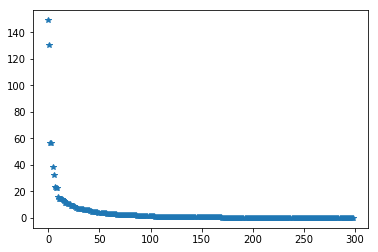

In [35]:
plt.plot(np.flip(np.sort(average_abundance)), "*")

-0.09312026178109133 1.0970152032953804


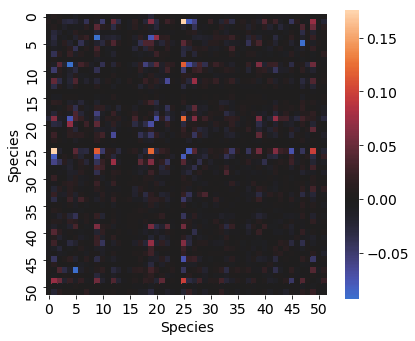

In [36]:
# plot the interaction matrix as a heatmap
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout(pad=2.5)
sns.heatmap(M_zero_diag, center=0, square=True, xticklabels=5, yticklabels=5, ax=ax)
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Species", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.savefig("./Figure/MaxEnt3_M_matrix.pdf")
print(M.min(), M.max())

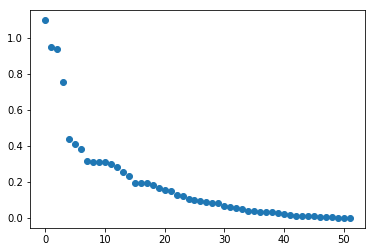

In [37]:
diag = M.diagonal()
diag = np.flip(np.sort(diag))
plt.plot(diag, "o")

(-0.2, 0.2)

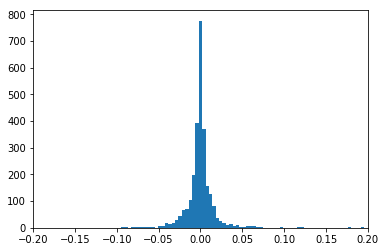

In [38]:
plt.hist(M.reshape(M.shape[0]*M.shape[1],1), bins=np.linspace(-.2,.2,100))
plt.xlim(-.2,.2)

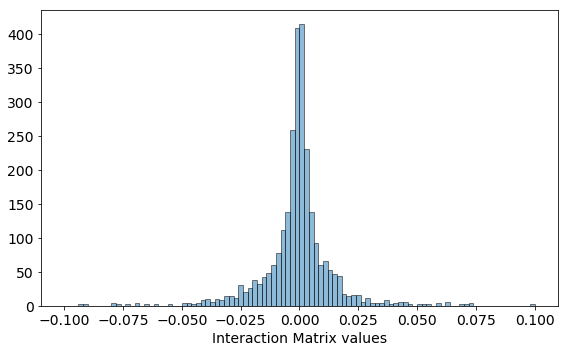

In [39]:
# plot the interaction matrix as a histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(M_zero_diag.reshape(M_zero_diag.shape[0]*M_zero_diag.shape[1],1), bins=100, range=(-.1,.1), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Interaction Matrix values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt3_M_matrix_hist.pdf")

In [40]:
# lagrangian parameters for Max Ent 3
lambda_MaxEnt3 = -np.dot(M, average_abundance[sel])
lambda_MaxEnt3

array([-4.83264797e-02, -1.16486070e+00, -2.93478529e-01, -3.11328000e-01,
       -3.66855711e-01, -1.07044286e-01, -3.01679453e-01, -1.63703924e-01,
       -1.73817090e-01, -9.70142202e-01,  3.49753298e-01,  3.54322694e-01,
       -6.89061916e-01,  4.13549615e-01, -1.03968491e-01, -3.21059683e-01,
       -5.60400020e-01, -8.49591230e-01, -5.25008504e-01, -1.12937430e+00,
       -6.70060527e-01, -5.33879178e-01, -2.37290542e-01, -2.87360127e-01,
       -4.33141090e-02, -1.96174052e+00,  3.47173808e-01, -4.27117072e-01,
        3.78209328e-01,  1.44537751e-01, -3.08590561e-01, -1.47285523e+00,
       -1.36667803e-03, -2.92927106e-02, -9.75952730e-01,  1.03818094e-01,
       -2.63891799e-01,  6.35529827e-02, -3.14243271e-01,  8.30471696e-02,
        2.37977688e-01, -5.95514036e-02, -3.67265304e-01, -3.19391612e-01,
       -4.46038392e-01, -4.19277073e-01, -2.19594166e-02, -4.22997646e-01,
       -1.44019814e-01, -1.06379959e+00, -1.43674020e-02, -1.91712012e-01])

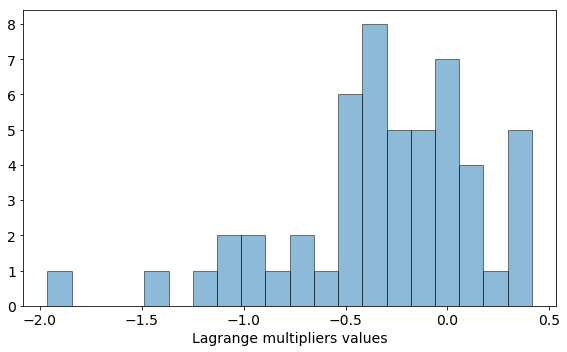

In [41]:
# plot the lagrangian parameters as a histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(lambda_MaxEnt3, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Lagrange multipliers values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt3_mu_j.pdf")

# Graph

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


1

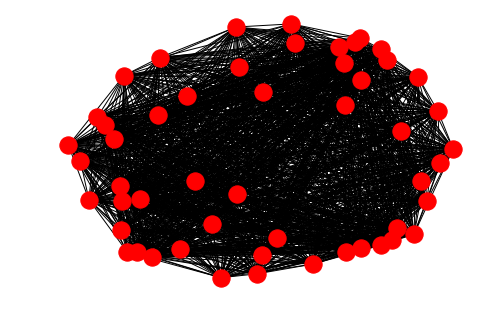

In [42]:
import networkx as nx
# create the graph from the interaction matrix
g = nx.from_numpy_matrix(M_zero_diag)
nx.draw(g)
nx.number_connected_components(g)

In [43]:
# find theta star
Theta = np.linspace(0, 0.4, 100)
Theta = np.append(Theta, np.linspace(0, .05, 1000))
Theta.sort()
theta_star, idx = None, None
n_comp = []
for index, theta in enumerate(Theta):
    # copy interaction matrix
    Mt = M_zero_diag.copy()
    # set to 0 all values below threshold
    Mt[np.abs(Mt) < theta] = 0
    # create the graph
    g = nx.from_numpy_matrix(Mt)
    # calc number of connected components and save it
    n_comp.append(nx.number_connected_components(g))
    if theta_star == None and nx.is_connected(g)==False: 
        # this update theta_star and idx only once
        theta_star = Theta[index]
        idx = index
theta_star, idx

(0.003103103103103103, 63)

([<matplotlib.axis.XTick at 0x23bb22d7eb8>,
 <a list of 4 Text xticklabel objects>)

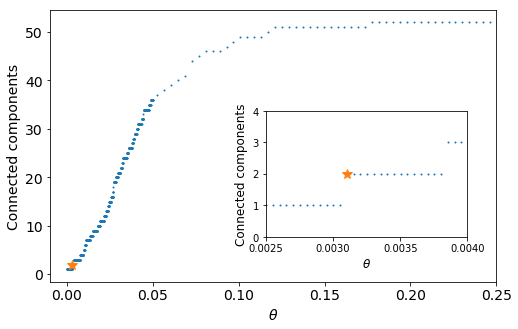

In [44]:
# plot the number of connected components as function of theta
plt.figure(figsize=(8,5))
plt.plot(Theta, n_comp, "D", markersize=.9)
plt.plot(theta_star, n_comp[idx], "*", markersize=10)
plt.ylabel("Connected components", fontsize=14)
plt.xlabel("$\\theta$", fontsize=14)
plt.xlim(-0.01,0.25)
plt.tick_params(axis='both', which='major', labelsize=14)
# subplot
a = plt.axes([.5, .25, .35, .35])
plt.plot(Theta, n_comp, "D", markersize=.9)
plt.plot(theta_star, n_comp[idx], "*", markersize=10)
plt.xlim(.0025, .004)
plt.ylim(0,4)
plt.ylabel("Connected components", fontsize=12)
plt.xlabel("$\\theta$", fontsize=12)
plt.xticks([.0025, .003, .0035, .004], ["0.0025", "0.0030", "0.0035", "0.0040"])



In [45]:
# value before theta star
Theta[idx-1]

0.0030530530530530533

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


1

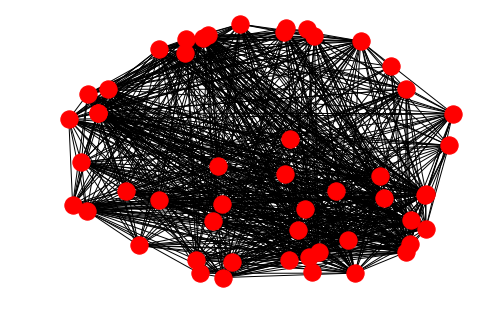

In [46]:
# graph with the highest threshold possibile, but still with 1 conncted component 
Mt = M_zero_diag.copy()
Mt[np.abs(Mt) < Theta[idx-1]] = 0
g = nx.from_numpy_matrix(Mt)
nx.draw(g)
nx.number_connected_components(g)

In [47]:
# caculate some properties of the graph
Mt = M_zero_diag.copy()
Mt[np.abs(Mt) < Theta[idx-1]] = 0
g = nx.from_numpy_matrix(Mt)

pathlengths = []

print("source vertex {target:length, }")
for v in g.nodes():
    spl = dict(nx.single_source_shortest_path_length(g, v))
    #print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))

print("radius: %d"       % nx.radius(g))
print("diameter: %d"     % nx.diameter(g))
print("eccentricity: %s" % nx.eccentricity(g))
print("center: %s"       % nx.center(g))
print("periphery: %s"    % nx.periphery(g))
print("density: %s"      % nx.density(g))

print("clustering: %s"         % nx.clustering(g))
print("clustering average: %s" % nx.average_clustering(g))


source vertex {target:length, }

average shortest path length 1.378698224852071

length #paths
0 52
1 1594
2 1040
3 18
radius: 2
diameter: 3
eccentricity: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 3, 15: 2, 16: 3, 17: 3, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 3, 24: 3, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 3, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 3, 41: 2, 42: 2, 43: 3, 44: 2, 45: 2, 46: 3, 47: 2, 48: 2, 49: 2, 50: 3, 51: 2}
center: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 47, 48, 49, 51]
periphery: [14, 16, 17, 23, 24, 32, 40, 43, 46, 50]
density: 0.6010558069381599
clustering: {0: 0.819047619047619, 1: 0.645760743321719, 2: 0.6777777777777778, 3: 0.7763440860215054, 4: 0.7492063492063492, 5: 0.6423034330011074, 6: 0.7468805704099821, 7: 0.7486631016042781, 8: 0.8333333333333334, 9: 0.6733615221987315, 10

In [48]:
# node degree
node_deg = g.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

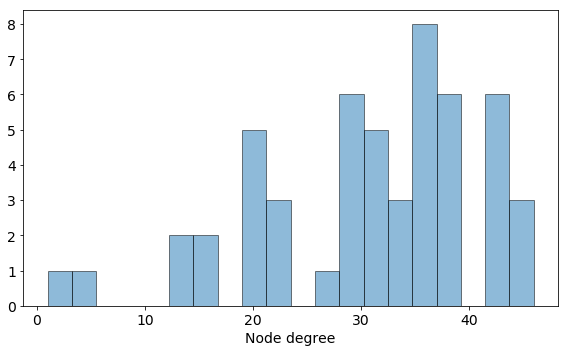

In [49]:
# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/Degree_distribution.pdf")

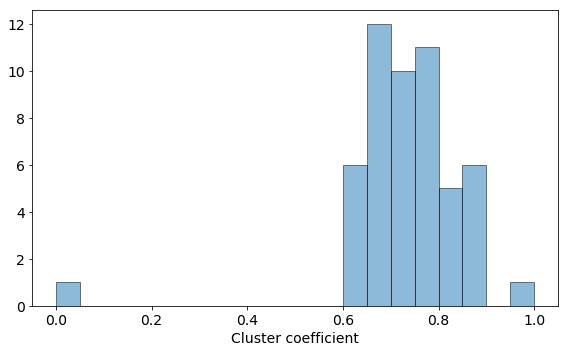

In [50]:
# cluster coefficients distribution as histogram
cluster_coeff = nx.clustering(g)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/Cluster_coeff.pdf")

In [51]:
# degree assortativity
deg_ass = nx.degree_assortativity_coefficient(g)
deg_ass

-0.23613751411463652

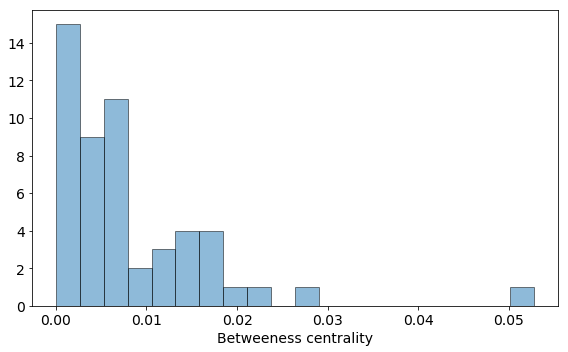

In [52]:
# betweenness centrality distribution as histogram
bet_centr = nx.betweenness_centrality(g)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(bet_centr.values(), bins=20, histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Betweeness centrality", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/Betweeness_centrality.pdf")

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


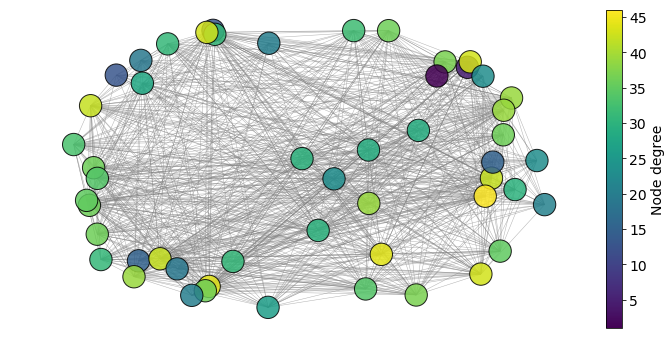

In [53]:
# draw the network graph with a nicer plot
fig, ax = plt.subplots(figsize=(10,5))
vmin = np.min(deg)
vmax = np.max(deg)
cmap = plt.cm.viridis
pos  = pos=nx.spring_layout(G=g)
#nx.draw_networkx(G=g, node_size=500, ax=ax, node_color=deg, edge_color="#d1d1d1", alpha=.8,
#                 with_labels=False, cmap=cmap, vmin=vmin, vmax=vmax, width=.5, linewidths=1.5)
nx.draw_networkx_edges(G=g, pos=pos, ax=ax, width=.5, edge_color="gray", alpha=.6)
nx.draw_networkx_nodes(G=g, pos=pos, ax=ax, node_size=500, node_color=deg, alpha=.85, cmap=cmap, vmin=vmin, vmax=vmax, edgecolors="k")
ax.axis("off")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Node degree", fontsize=14)
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/graph.pdf")

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


radius: 2
diameter: 2
eccentricity: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2}
center: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
periphery: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
density: 0.6063348416289592
clustering: {0: 0.5890151515151515, 1: 0.6028225806451613, 2: 0.6164021164021164, 3: 0.6021021021021021, 4: 0.5974025974025974, 5: 0.6064516129032258, 6: 0.58689458

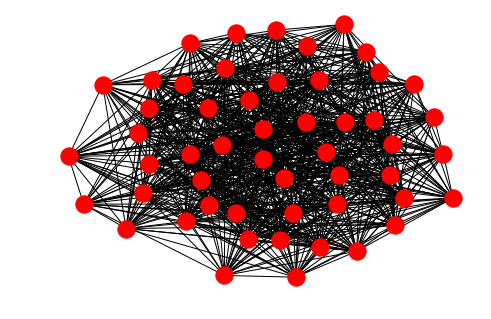

In [54]:
# Erdos Renyi graph
ave_degree = np.array(deg).mean()
n   = 52
p   = ave_degree/(n-1)
GER = nx.erdos_renyi_graph(n, p)

nx.draw(GER)

print("radius: %d" % nx.radius(GER))
print("diameter: %d" % nx.diameter(GER))
print("eccentricity: %s" % nx.eccentricity(GER))
print("center: %s" % nx.center(GER))
print("periphery: %s" % nx.periphery(GER))
print("density: %s" % nx.density(GER))

print("clustering: %s" % nx.clustering(GER))
print("clustering average: %s" % nx.average_clustering(GER))

In [55]:
#########################
# Comparison histograms #
#########################

# node degree
node_deg_ER = GER.degree()
node_deg_ER = list(node_deg_ER)
deg_ER = [x[1] for x in node_deg_ER]

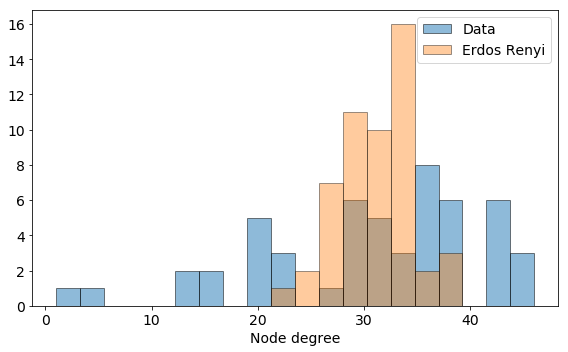

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
_, bins, _ = ax.hist(deg, bins=20, histtype='bar', ec='black', alpha=.5, label="Data")
ax.hist(deg_ER, bins=bins, histtype='bar', ec='black', alpha=.4, label="Erdos Renyi")
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="best", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/Degree_distribution_comparison.pdf")

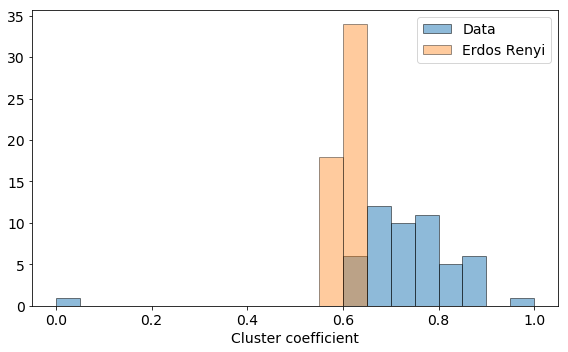

In [57]:
# cluster coefficients
cluster_coeff_ER = nx.clustering(GER)
fig, ax = plt.subplots(figsize=(8,5))
_, bins, _ = ax.hist(cluster_coeff.values(), bins=20, histtype='bar', ec='black', alpha=.5, label="Data")
ax.hist(cluster_coeff_ER.values(), bins=bins, histtype='bar', ec='black', alpha=.4, label="Erdos Renyi")
ax.set_xlabel("Cluster coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="best", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/Cluster_coeff_comparison.pdf")

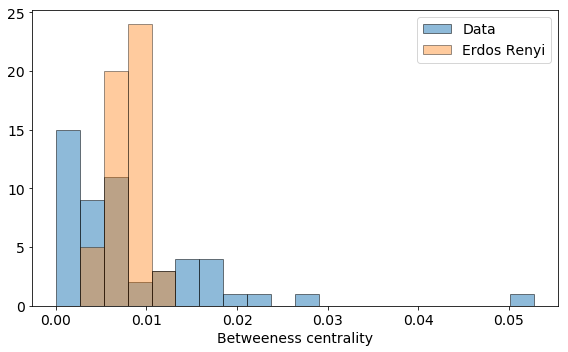

In [58]:
# betweenness centrality
bet_centr_ER = nx.betweenness_centrality(GER)
fig, ax = plt.subplots(figsize=(8,5))
_, bins, _ = ax.hist(bet_centr.values(), bins=20, histtype='bar', ec='black', alpha=.5, label="Data")
ax.hist(bet_centr_ER.values(), bins=bins, histtype='bar', ec='black', alpha=.4, label="Erdos Renyi")
ax.set_xlabel("Betweeness centrality", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc="best", fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/Betweeness_centrality_comparison.pdf")

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


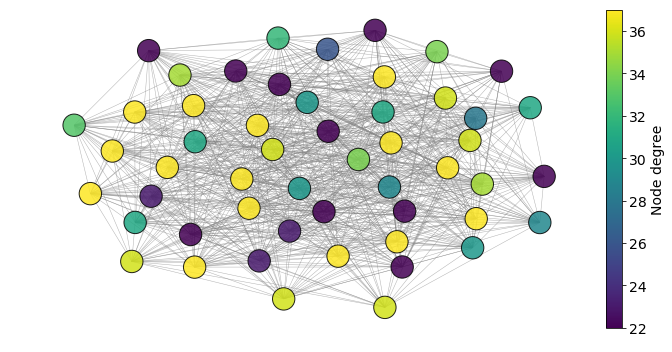

In [59]:
# draw the network graph with a nicer plot
fig, ax = plt.subplots(figsize=(10,5))
vmin = np.min(deg_ER)
vmax = np.max(deg_ER)
cmap = plt.cm.viridis
pos  = pos=nx.spring_layout(G=GER)
nx.draw_networkx_edges(G=GER, pos=pos, ax=ax, width=.5, edge_color="gray", alpha=.6)
nx.draw_networkx_nodes(G=GER, pos=pos, ax=ax, node_size=500, node_color=deg, alpha=.85, cmap=cmap, vmin=vmin, vmax=vmax, edgecolors="k")
ax.axis("off")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Node degree", fontsize=14)
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/graph_ER.pdf")